# Decision Tree

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("dataset/CL-dataset.csv",sep='\t',decimal=",",index_col=0)
df = df.drop(columns=["CustomerID"])

In [23]:
df.head()

,Imax,E,PIL,Mb,MeanD,EDate,class
0,12,4.335643,2.567,156.860294,0.000000,0.000000,2
1,32,6.503112,2.567,356.232222,35.000000,2.226424,2
2,360,6.504979,2.752,442.969333,24.266667,2.235084,2
3,80,4.494680,2.567,189.650000,55.400000,1.177965,1
4,32,0.000000,2.567,292.000000,13.000000,0.918296,1


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

label = df.pop('class')
train_set, test_set, train_label, test_label = train_test_split(df, label, stratify =label, test_size=0.30)

In [25]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

## Grid Search

In [28]:

grid_params={
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[5,10,15],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,3,5],
    'min_impurity_decrease':[0,0.1,0.2]
}


gs=GridSearchCV(DecisionTreeClassifier(),grid_params,verbose=1,n_jobs=3,scoring='accuracy')
gs.fit(train_set,train_label)
print("Best Score: ",gs.best_score_)
print("Best Params: ",gs.best_params_)

print("Complete Grid search:")
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))

'random'}
0.661 (+/-0.023) for {'criterion': 'entropy', 'max_depth': 5, 'min_impurity_decrease': 0.2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.624 (+/-0.029) for {'criterion': 'entropy', 'max_depth': 5, 'min_impurity_decrease': 0.2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
0.661 (+/-0.023) for {'criterion': 'entropy', 'max_depth': 5, 'min_impurity_decrease': 0.2, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
0.600 (+/-0.089) for {'criterion': 'entropy', 'max_depth': 5, 'min_impurity_decrease': 0.2, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
0.661 (+/-0.023) for {'criterion': 'entropy', 'max_depth': 5, 'min_impurity_decrease': 0.2, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'best'}
0.632 (+/-0.026) for {'criterion': 'entropy', 'max_depth': 5, 'min_impurity_decrease': 0.2, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'}
0.661 (+/-0.023) for {'crite

## Modello Finale

In [60]:
#define a decision tree and fit it

dt = tree.DecisionTreeClassifier(criterion='gini', splitter='best', 
                                  max_depth=5, 
                                  min_samples_split=3, min_samples_leaf=4)
dt = dt.fit(train_set, train_label)

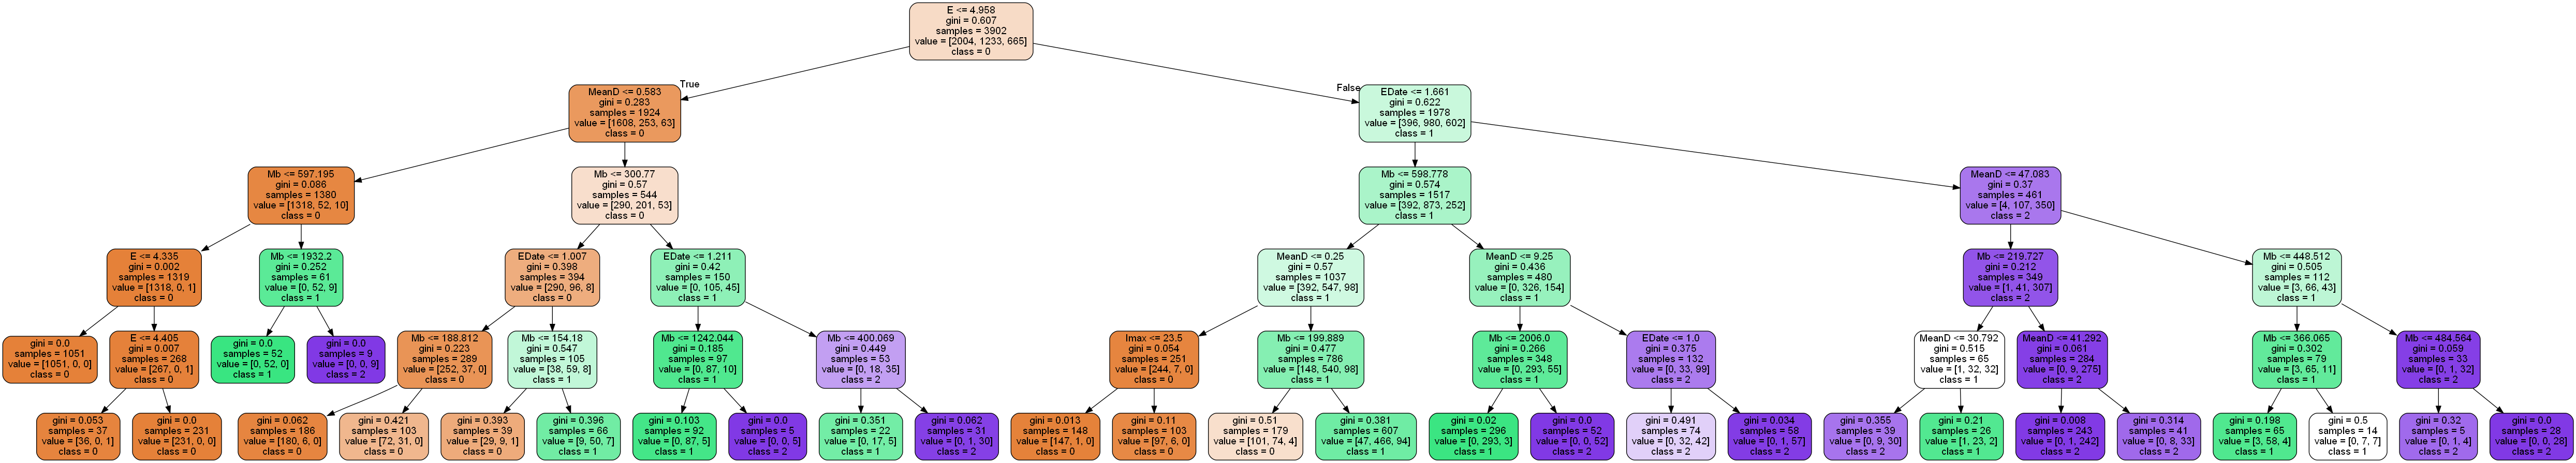

In [61]:
#visualize the actual decision tree obtained 
import pydotplus 
from IPython.display import Image, display



dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names=list(train_set.columns),  
                         class_names=['0','1','2'],  
                         filled=True, rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png(), width=800, height=500)


In [62]:
from graphviz import Source
from sklearn import tree
from IPython.display import SVG
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

graph = Source( dot_data)
graph.format = 'png'
graph.render('dtree_render',view=True)


'dtree_render.png'

In [32]:
#predict using the decision tree
#the predict function returns the actual predicted labels: we need them for the evaluation phase
train_pred_dt = dt.predict(train_set)
test_pred_dt = dt.predict(test_set)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(test_label, 
                            test_pred_dt, 
                            target_names=['0','1','2']))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       859
           1       0.82      0.83      0.82       529
           2       0.85      0.73      0.79       285

    accuracy                           0.89      1673
   macro avg       0.87      0.85      0.86      1673
weighted avg       0.89      0.89      0.89      1673



In [34]:
#compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_label, test_pred_dt)
cm

array([[837,  22,   0],
       [ 53, 440,  36],
       [  0,  76, 209]], dtype=int64)

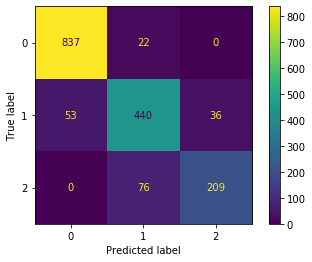

In [35]:
#it is possible to plot the confusion matrix 
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(dt, test_set, test_label)
plt.show() 

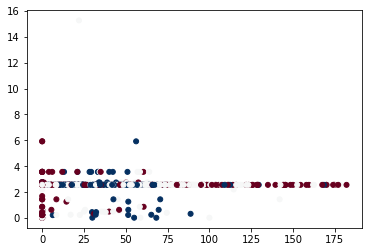

In [36]:
from sklearn.datasets import make_blobs
plt.scatter(test_set.iloc[:, 4].values, test_set.iloc[:, 2].values, c=test_label.values, s=25, cmap='RdBu');

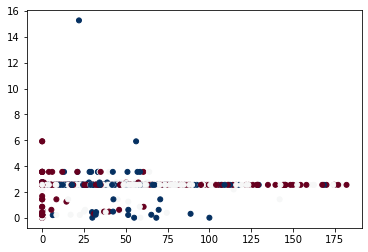

In [37]:
plt.scatter(test_set.iloc[:, 4].values, test_set.iloc[:, 2].values, c=test_pred_dt, s=25, cmap='RdBu');

In [38]:
#evaulate the accuracy on the train set and the test set
#metrics also contains precision, recall, f1 and the support
from sklearn import metrics
print('Accuracy train set ', metrics.accuracy_score(train_label, train_pred_dt))
print('Accuracy test set ', metrics.accuracy_score(test_label, test_pred_dt))
print('Precision train set ', metrics.precision_score(train_label, train_pred_dt, average='weighted'))
print('Recall train set ', metrics.recall_score(train_label, train_pred_dt, average='weighted'))
print('F1 score train set ', metrics.f1_score(train_label, train_pred_dt, average='weighted'))
print('Support train set ', metrics.precision_recall_fscore_support(train_label, train_pred_dt))

Accuracy train set  0.9044079958995387
Accuracy test set  0.8882247459653317
Precision train set  0.9040190447171627
Recall train set  0.9044079958995387
F1 score train set  0.9034581188314446
Support train set  (array([0.93596533, 0.84919355, 0.90940171]), array([0.97005988, 0.8540146 , 0.8       ]), array([0.95270767, 0.85159725, 0.8512    ]), array([2004, 1233,  665], dtype=int64))


In [39]:
#cross validation
#the score array for test/train scores on each cv split
#the time for fitting/scoring the estimator on the train set for each cv split
from sklearn.model_selection import cross_validate
import statistics 
scores = cross_validate(dt, train_set, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.0407265822092692
Score time  0.004655202229817708
Test score  0.8792889099115079
Train score  0.9000503166808564
